In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Default.csv to Loan_Default (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv('Loan_Default.csv')

In [ ]:
#print basic info of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
#Summary statistics
print(df.describe())

                  ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%       

In [ ]:
null_values = df.isnull().sum()
# Print the total # of null value in each column
print(null_values)

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
# print the percentage of null values in each column
print(null_percentage)

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score             

In [ ]:
# drop the columns with null percentage >95%
data_cleaned = df.drop(columns=null_percentage[null_percentage > 95].index)
# Print the columns that were dropped
dropped_columns = null_percentage[null_percentage > 95].index
if len(dropped_columns) > 0:
  print(f"Columns dropped: {dropped_columns}")
else:
  print("No Column is Dropped")

No Column is Dropped


In [ ]:
# Fill null values based on column type
# for column in df.columns:
#     if df[column].isnull().sum() > 0:  # Check if column has null values
#         if df[column].dtype in ['int64', 'float64']:
#             # Fill with mean for numeric columns
#             mean_value = df[column].mean()
#             df[column].fillna(mean_value)
#         elif df[column].dtype == 'object':
#             # Fill with mode for object columns
#             mode_value = df[column].mode()[0]  # Mode returns a Series, take the first value
#             df[column].fillna(mode_value)

for i in df.columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        # df[i].fillna(df[i].mean(),inplace=True)
        df[i].fillna(df[i].mean())
    else:
        # df[i].fillna(df[i].mode()[0],inplace=Truee)
        df[i].fillna(df[i].mode()[0])


In [ ]:
new_null_value = df.isnull().sum()
print(new_null_value)

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

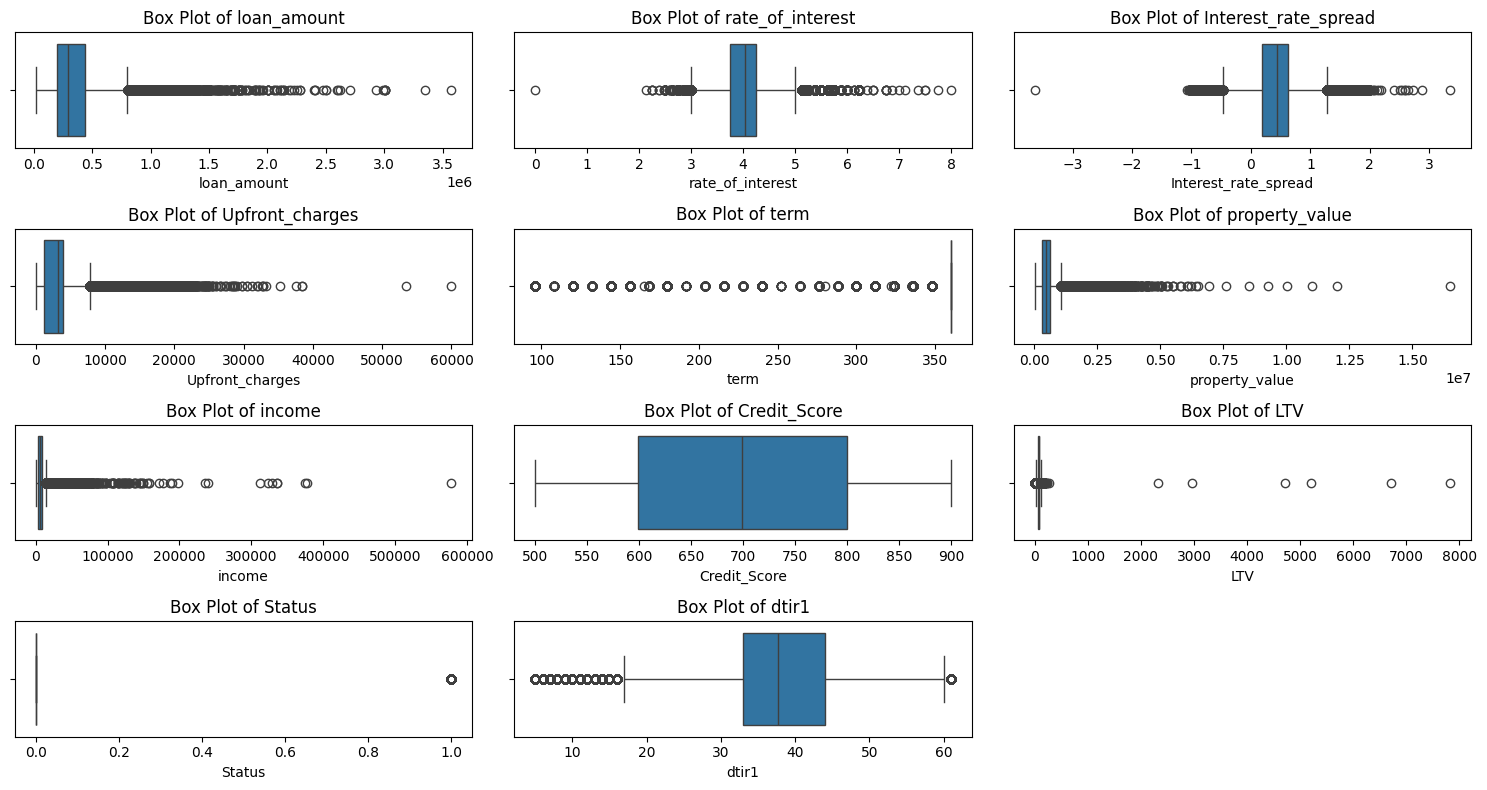

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_exclude = ['year', 'ID']
numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in columns_to_exclude]

# Plot box plots for each numerical column to visually inspect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Focus on analyzing 2 features:
print(df[['rate_of_interest', 'Interest_rate_spread']].describe())

       rate_of_interest  Interest_rate_spread
count     148670.000000         148670.000000
mean           4.045476              0.441656
std            0.487764              0.445359
min            0.000000             -3.638000
25%            3.750000              0.181500
50%            4.045476              0.441656
75%            4.250000              0.620000
max            8.000000              3.357000


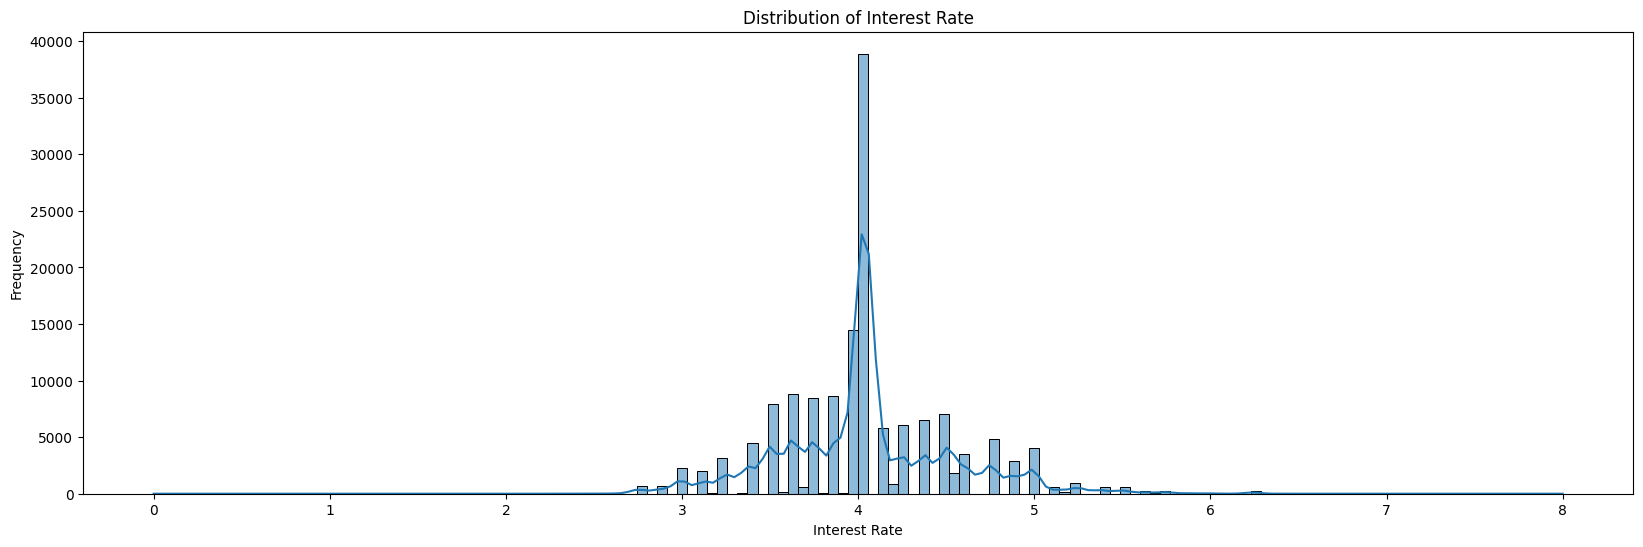

In [ ]:
# Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Interest Rate
plt.figure(figsize=(20, 6))
sns.histplot(df['rate_of_interest'], bins=140, kde=True)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

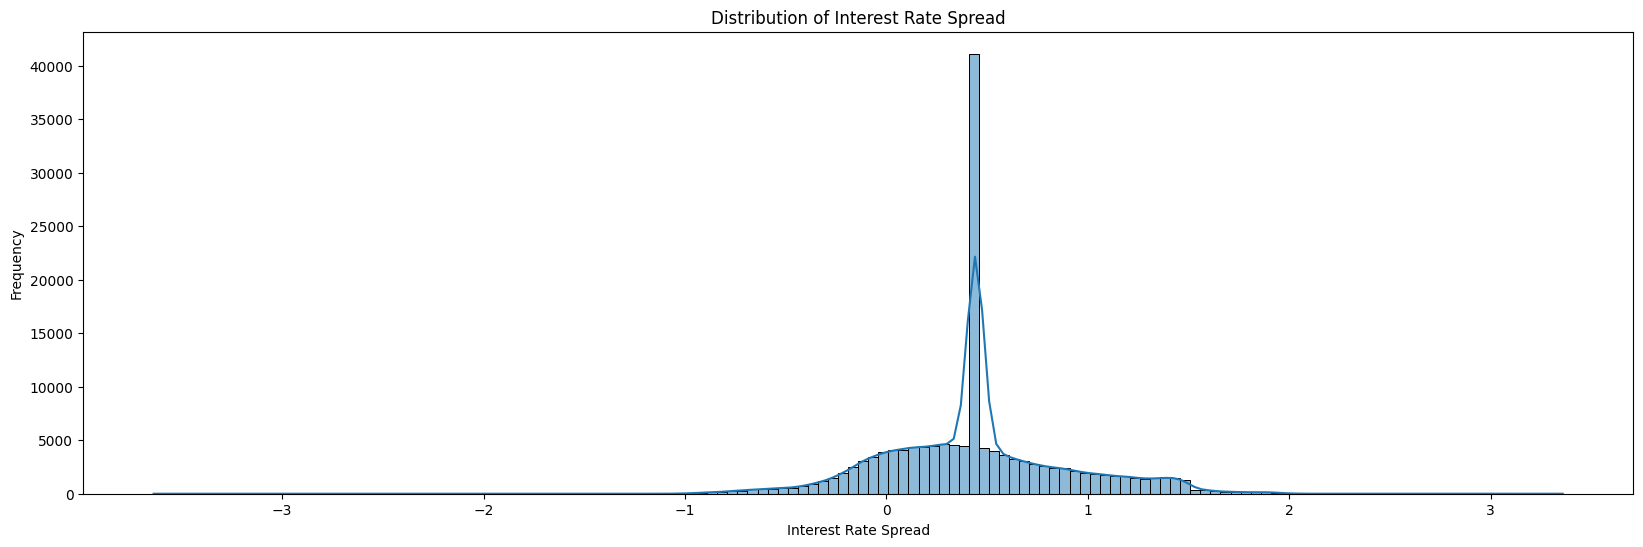

In [ ]:
# Distribution of Interest Rate Spread
plt.figure(figsize=(20, 6))
sns.histplot(df['Interest_rate_spread'], bins=140, kde=True)
plt.title('Distribution of Interest Rate Spread')
plt.xlabel('Interest Rate Spread')
plt.ylabel('Frequency')
plt.show()

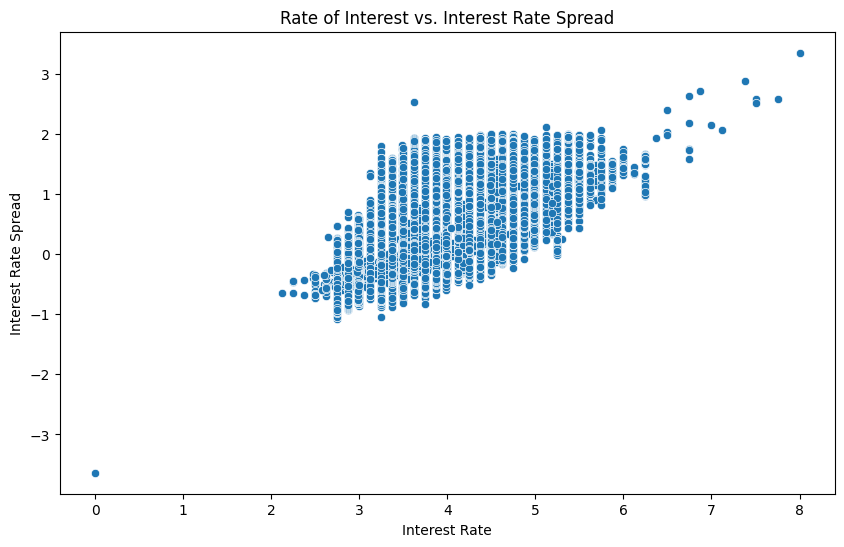

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate_of_interest', y='Interest_rate_spread', data=df)
plt.title('Rate of Interest vs. Interest Rate Spread')
plt.xlabel('Interest Rate')
plt.ylabel('Interest Rate Spread')
plt.show()

In [ ]:
import numpy as np
df['z_score'] = (df['rate_of_interest'] - df['rate_of_interest'].mean()) / df['rate_of_interest'].std()
# if z-score > 2, we will identify that data point as an outlier
anomalies = df[np.abs(df['z_score']) > 3]
print(anomalies)

            ID  year loan_limit             Gender approv_in_adv loan_type  \
850      25740  2019         cf             Female         nopre     type1   
997      25887  2019         cf  Sex Not Available         nopre     type1   
1780     26670  2019         cf              Joint         nopre     type1   
1797     26687  2019         cf               Male           pre     type1   
2391     27281  2019         cf              Joint         nopre     type1   
...        ...   ...        ...                ...           ...       ...   
147832  172722  2019         cf             Female           pre     type1   
147893  172783  2019         cf  Sex Not Available         nopre     type1   
148325  173215  2019         cf               Male         nopre     type1   
148484  173374  2019         cf              Joint         nopre     type1   
148655  173545  2019         cf              Joint         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_c

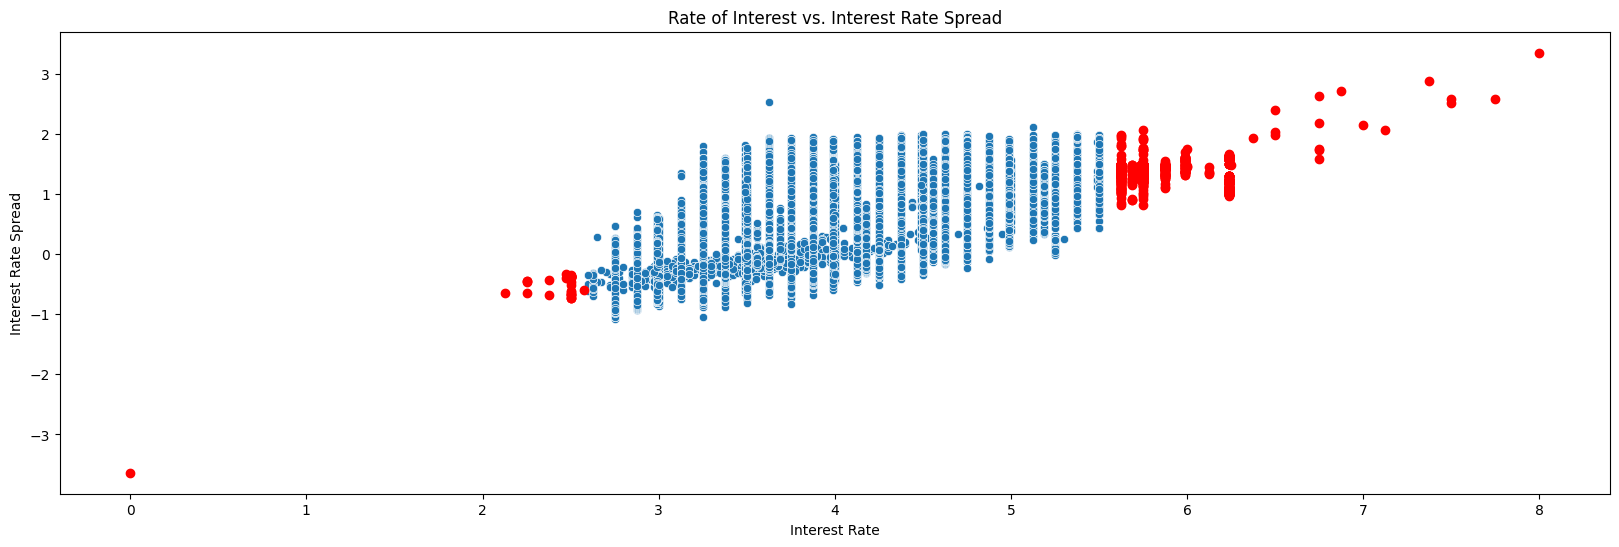

In [ ]:
# Visualize Outliers
plt.figure(figsize=(20, 6))
sns.scatterplot(x='rate_of_interest', y='Interest_rate_spread', data=df, marker='o')
plt.scatter(anomalies['rate_of_interest'], anomalies['Interest_rate_spread'], color='red')
plt.title('Rate of Interest vs. Interest Rate Spread')
plt.xlabel('Interest Rate')
plt.ylabel('Interest Rate Spread')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical (object) columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Status',axis='columns')
Y = df.Status
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=True)

In [ ]:
print(X_train.isnull().sum())  # Check missing values in each column
print(X_train.isnull().sum().sum())  # Total number of missing values

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
dtir1   

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(Y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")

K-Nearest Neighbors Accuracy: 82.84%


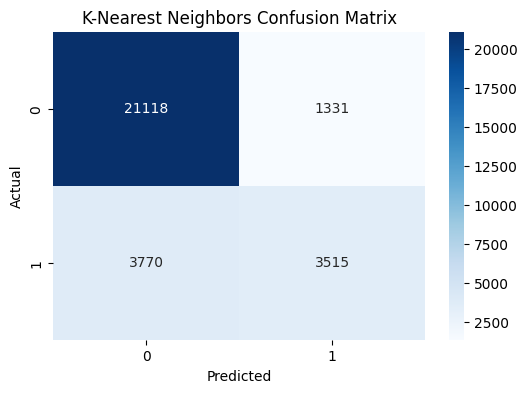

In [ ]:
from sklearn.metrics import confusion_matrix
knn_confusion = confusion_matrix(Y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
knn_classification_report = classification_report(Y_test, y_pred_knn)
print("K-Nearest Neighbors Classification Report:")
print(knn_classification_report)

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     22449
           1       0.73      0.48      0.58      7285

    accuracy                           0.83     29734
   macro avg       0.79      0.71      0.74     29734
weighted avg       0.82      0.83      0.82     29734



In [ ]:
print(X_train.dtypes)

ID                             int64
year                           int64
loan_limit                     int64
Gender                         int64
approv_in_adv                  int64
loan_type                      int64
loan_purpose                   int64
Credit_Worthiness              int64
open_credit                    int64
business_or_commercial         int64
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization              int64
interest_only                  int64
lump_sum_payment               int64
property_value               float64
construction_type              int64
occupancy_type                 int64
Secured_by                     int64
total_units                    int64
income                       float64
credit_type                    int64
Credit_Score                   int64
co-applicant_credit_type       int64
a

In [ ]:
print(X_test.dtypes)

ID                             int64
year                           int64
loan_limit                     int64
Gender                         int64
approv_in_adv                  int64
loan_type                      int64
loan_purpose                   int64
Credit_Worthiness              int64
open_credit                    int64
business_or_commercial         int64
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization              int64
interest_only                  int64
lump_sum_payment               int64
property_value               float64
construction_type              int64
occupancy_type                 int64
Secured_by                     int64
total_units                    int64
income                       float64
credit_type                    int64
Credit_Score                   int64
co-applicant_credit_type       int64
a

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Get the probability predictions for ROC AUC (only for applicable models)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = np.zeros(len(Y_test))

    # Evaluate the model using several metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='binary')
    recall = recall_score(Y_test, Y_pred, average='binary')
    f1 = f1_score(Y_test, Y_pred, average='binary')

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
    }

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def run_classification_models(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(probability=True)  # Enable probability for SVM
    }

    # Dictionary to store results for each model
    results = {}

    # Iterate through each model and evaluate it
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model_results = evaluate_model(model, X_train, Y_train, X_test, Y_test)
        results[model_name] = model_results

    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results).T
    print("\nModel Comparison:")
    print(results_df)

    return results_df

In [ ]:
run_classification_models(X_train, Y_train, X_test, Y_test)

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training K-Nearest Neighbors...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...

Model Comparison:
                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.754961   0.000000  0.000000  0.000000
K-Nearest Neighbors     0.828446   0.725340  0.482498  0.579507
Decision Tree           0.999832   0.999588  0.999725  0.999657
Random Forest           0.999966   1.000000  0.999863  0.999931
Support Vector Machine  0.781025   0.795872  0.142896  0.242290


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.754961,0.000000,0.000000,0.000000
K-Nearest Neighbors,0.828446,0.725340,0.482498,0.579507
Decision Tree,0.999832,0.999588,0.999725,0.999657
Random Forest,0.999966,1.000000,0.999863,0.999931
Support Vector Machine,0.781025,0.795872,0.142896,0.242290
